In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read json into a pandas dataframe
players = pd.read_json('players.json')

# re-order columns
players = players[['year','name','pos','age','status','prev_team','new_team','dollars','years_signed']]

In [3]:
players.head()

,year,name,pos,age,status,prev_team,new_team,dollars,years_signed
0,2006,Moises Alou,LF,39,Signed (A),Giants,Mets,"$8,500,000",1
1,2006,Tony Armas,SP,28,Signed,Nationals,Pirates,"$3,500,000",1
2,2006,Rich Aurilia,1B,34,Signed (A),Reds,Giants,"$8,000,000",2
3,2006,Danys Baez,RP,28,Signed (A),Braves,Orioles,"$19,000,000",3
4,2006,Paul Bako,C,33,Signed,Royals,Orioles,"$900,000",1


# Analysis of by Year

First we clean the 'dollars' column by removing non-digit characters and casting from string to int.

In [4]:
if players['dollars'].dtype == 'object':
    players['dollars'] = players['dollars'].str.replace('$','').str.replace(',','').astype(int)

We can generate a scatter plot which shows the size of each contract signed alongside the year.  The points for Alex Rodriguez and Bryce Harper's record-setting contracts are labeled.

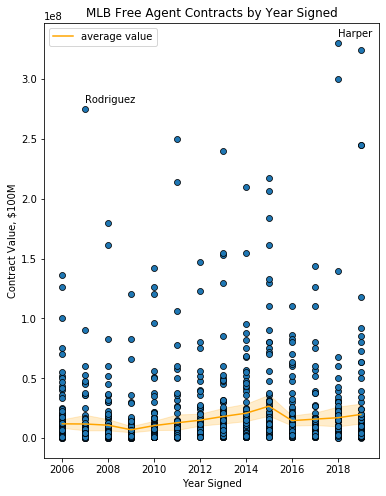

In [48]:
fig, ax = plt.subplots(figsize=(6,8))

# Scatter plot
sns.lineplot(x='year',y='dollars', data=players, color='orange', label='average value', ax=ax)
sns.scatterplot(x='year',y='dollars', data=players, edgecolor='black', ax=ax)

plt.legend(loc='upper left')
ax.set_title('MLB Free Agent Contracts by Year Signed')
ax.set_ylabel('Contract Value, $100M')
ax.set_xlabel('Year Signed')
ax.text(2007,280000000,'Rodriguez')
ax.text(2018,335000000,'Harper')

plt.savefig('figures/contracts_by_year.png', bbox_inches='tight')
plt.show()

# Analysis by Age

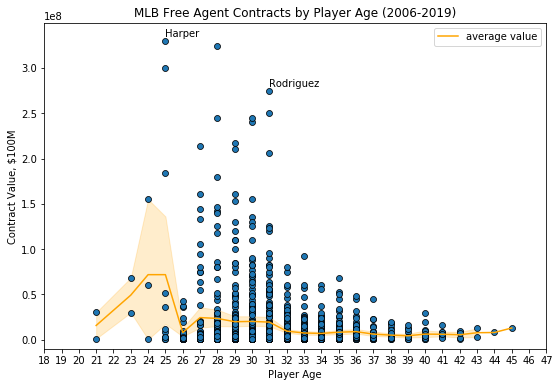

In [51]:
fig, ax = plt.subplots(figsize=(9,6))

x_ticks = np.arange(30) + 18
y_ticks = 50000000 * np.arange(7)

# Scatter plot
ax = sns.lineplot(x='age', y='dollars', data=players, color='orange', label='average value')
sns.scatterplot(x='age', y='dollars', data=players, edgecolor='black')

ax.legend(loc='best')
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_ylim([-10000000,350000000])
ax.set_title('MLB Free Agent Contracts by Player Age (2006-2019)')
ax.set_ylabel('Contract Value, $100M')
ax.set_xlabel('Player Age')
ax.text(31,280000000,'Rodriguez')
ax.text(25,335000000,'Harper')

plt.savefig('figures/contracts_by_age.png', bbox_inches='tight')
plt.show()

# Analysis by Position

We have some minimal cleaning to do on the 'pos' column.  Namely, there are 3 rows where the position is set to 'P', and 5 where the position is set to 'OF'.  We want these to be set to more specific values, such as 'SP' or 'LF', so we will manually fix these.

In [7]:
# correct pitcher positions
players.loc[players['name']=='Adam Eaton', 'pos'] = 'SP'
players.loc[players['name']=='Andrew Bailey', 'pos'] = 'RP'
players.loc[players['name']=='Eddie Guardado', 'pos'] = 'RP'

# correct outfield positions
players.loc[players['name']=='Jose Cruz Jr.', 'pos'] = 'LF'
players.loc[players['name']=='So Taguchi', 'pos'] = 'LF'
players.loc[players['name']=='Fred Lewis', 'pos'] = 'LF'
players.loc[players['name']=='Carlos Beltran', 'pos'] = 'CF'

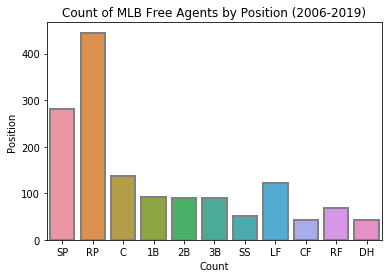

In [76]:
position_order = ['SP','RP','C','1B','2B','3B','SS','LF','CF','RF','DH']

sns.countplot(x='pos', order=position_order, linewidth=2, edgecolor='grey', data=players)
plt.title('Count of MLB Free Agents by Position (2006-2019)')
plt.ylabel('Position')
plt.xlabel('Count')

plt.show()

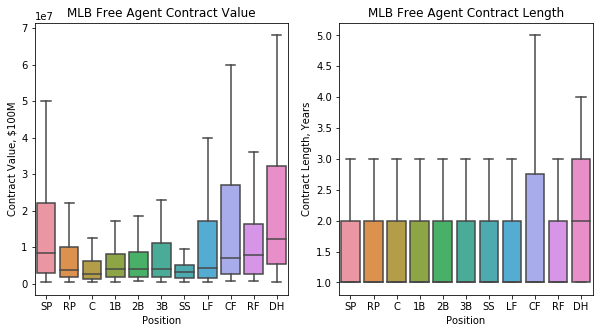

In [71]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(x='pos', y='dollars', data=players, order=position_order, ax=ax1, sym='')
ax1.set_title('MLB Free Agent Contract Value')
ax1.set_ylabel('Contract Value, $100M')
ax1.set_xlabel('Position')

sns.boxplot(x='pos', y='years_signed', data=players, order=position_order, sym='', ax=ax2)
ax2.set_title('MLB Free Agent Contract Length')
ax2.set_ylabel('Contract Length, Years')
ax2.set_xlabel('Position')

plt.show()